                                                                                                              Manal Arman

 # <div class="alert alert-danger">Data Science Task _ GSG</div>  
 ##  <font color=indianred> **Analyzing the IMDB Dataset of Top 1000 Movies and TV Shows using Pandas:** </font> 

#### <div class="alert alert-danger">1. Download the IMDB dataset of top 1000 movies and TV shows from Kaggle and load it into a pandas dataframe using the read_csv() function.</div>  

In [1]:
#import all needed libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# load IMDB dataset into a pandas dataframe using the read_csv() method:
movies_TV_shows_df= pd.read_csv(r"C:\Users\HP\Downloads\archive\imdb_top_1000.csv")
# make a copy of the original dataframe to work on it:
movies_df=movies_TV_shows_df.copy()
# Find out the total rows and columns of the given DataFrame:
movies_df.shape

(1000, 16)

In [2]:
#quick view to the given data:
movies_df.head(3)


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


#### <div class="alert alert-danger">2. Clean and preprocess the data by removing unnecessary columns and handling missing values.</div>  


In [3]:
#display information about the structure and content of the DataFrame:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [4]:
#brief statistics for the numerical columns in the Data frame.
#this helps to know simple statistics about the data and understand it more.
movies_df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [5]:
#generate summary statistics for the columns of object data type (categorical columns) in the DataFrame:
movies_df.describe(include=object)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4,Gross
count,1000,1000,1000,899,1000,1000,1000,1000,1000,1000,1000,1000,831
unique,1000,999,100,16,140,202,1000,548,660,841,891,939,823
top,https://m.media-amazon.com/images/M/MV5BMDFkYT...,Drishyam,2014,U,100 min,Drama,Two imprisoned men bond over a number of years...,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,"4,360,000"
freq,1,2,32,234,23,85,1,14,12,7,5,4,5


In [6]:
movies_df.nunique()  #number of unique elements in each column

Poster_Link      1000
Series_Title      999
Released_Year     100
Certificate        16
Runtime           140
Genre             202
IMDB_Rating        17
Overview         1000
Meta_score         63
Director          548
Star1             660
Star2             841
Star3             891
Star4             939
No_of_Votes       999
Gross             823
dtype: int64

In [7]:
# Check for number of unique values for the column 'Series_Title'
movies_df.Series_Title.nunique()


999

- here the column that represents the name of the movies 'Series_Title',has 999 unique values, so It must be checked if there is a duplicate value, then the duplicate title must be deleted:

In [8]:
# Check for duplicate values in the column 'Series_Title':
movies_df.Series_Title.duplicated().any()

True

In [9]:
# Find out the movies with duplicate 'Series_Title'
movies_df.loc[movies_df.Series_Title.duplicated(keep=False)] # check for duplicate values in the 'Series_Title' column. 
#The duplicated() method returns a boolean Series where indicates whether the value is duplicated or not. 
#by (keep=False,) all occurrences of duplicated values are marked as True.
#loc here is used to filter the DataFrame based on a condition.which selects the rows where the 'Series_Title' column has duplicate values.

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
87,https://m.media-amazon.com/images/M/MV5BYmY3Mz...,Drishyam,2013,U,160 min,"Crime, Drama, Thriller",8.3,A man goes to extreme lengths to save his fami...,NaN,Jeethu Joseph,Mohanlal,Meena,Asha Sharath,Ansiba,30722,NaN
136,https://m.media-amazon.com/images/M/MV5BYmJhZm...,Drishyam,2015,UA,163 min,"Crime, Drama, Mystery",8.2,Desperate measures are taken by a man who trie...,NaN,Nishikant Kamat,Ajay Devgn,Shriya Saran,Tabu,Rajat Kapoor,70367,"739,478"


So there are no duplicate movies. The movie with Title "Drishyam" was released on 2013 and 2015,and they are different in the rest of the information in the other columns too, so they are two different movies.

###  <font color=indianred> ***the columns in the IMDB dataset and the corresponding process for each one:*** </font> 
**These adjustments to the data and columns are based on the upcoming requirements of this analysis and the information that needs to be accessed and extracted.**

- <font color=brown> Poster_Link</font>: Link of the poster that imdb using.
- - (**I will drop it because the movie poster will not help us with the analysis that we will do here,in addition the images are very small and unclear**).

- <font color=brown>Series_Title</font>: essential for identifying and referencing each film in analysis.
- - (**rename to 'Movie_Title'**)

- <font color=brown>Released_Year</font>: can be relevant in identifying trends and patterns over time and can help analyze the popularity of different genres across different years.
- - (**convert type to int**),(I will not convert it to the datetime data type because it contains only the number of the year)

- <font color=brown>Certificate</font>:It can Indicates into the target audience and potentially influence the popularity of certain genres.
- - (**contains missing values need to handle with them**)

- <font color=brown>Runtime</font>: It can be relevant to understand the audience preference for certain genres based on the duration of the content.
- - (**rename to 'Time_min',convert type to int**)

- <font color=brown>Genre</font>: This is important column for identifying the most popular genre.
- - (**Convert the words in each cell to a list of Genres**) by split the values in the 'Genre' column based on the comma (',') stores the result as a list,so it becomes easy to manipulate and extract.



- <font color=brown>IMDB_Rating</font>:_out of 10_,it provide insights into the overall quality and reception of different movies and TV shows.

- <font color=brown>Overview</font>: mini story/ summary.
- -(**I will drop it because the mini-story of the movie is not relevant to the required analysis**)

- <font color=brown>Meta_score</font>:_out of 100_, this column represents the score earned by the movie or TV show on a different platform.  it provides an additional measure of critical reception.
- - (**contains missing values need to handle**)

- <font color=brown>Director</font>: represents the name of the director for each movie, and it is a very important column for the required analysis.


- <font color=brown>Star1,Star2,Star3,Star4</font>:contain the names of the stars or actors in the movie or TV show.
- - (**I will drop them,since they not directly relevant to the required analysis**)


- <font color=brown>No_of_votes</font>:represents the total number of votes received by the movie or TV show. It can indicate the level of audience engagement and popularity,which indirectly relates to the popularity of different genres.
- - (**rename to 'Num_of_votes'**)

- <font color=brown>Gross</font>:represents the money earned by the movie,and it can provide insights into the financial success of different genres.
- - (**convert type to float**,**contains missing values need to handle**)

> **Delete the previously mentioned columns:**

In [10]:
# by using drop() method to drop specific rows or columns from the DataFrame and specify the labels of the columns need to drop.
movies_df.drop(['Poster_Link', 'Overview','Star1','Star2','Star3','Star4'], axis=1, inplace=True)
print(movies_df.shape)
#to ensure the previous line was executed successfully:
movies_df.head(2)

(1000, 10)


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,"134,966,411"


> **Renaming the previously mentioned columns:**

In [11]:
#rename method----'current column name' : 'new name'---,
movies_df.rename(columns={'Series_Title': 'Movie_title','Runtime':'Time_min','No_of_Votes': 'Num_of_votes'} , inplace = True)
#(inplace = True)to modify the DataFrame in-place.

#to ensure the previous line was executed successfully:
movies_df.head(2)


,Movie_title,Released_Year,Certificate,Time_min,Genre,IMDB_Rating,Meta_score,Director,Num_of_votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,"134,966,411"


> **changing the type of columns that previously mentioned(`'Released_Year','Time_min','Gross'`):**

In [12]:
#'Released_Year' column:
# Check if there any cells with characters or symbols in the "Released_Year" column:
invalid_years = movies_df[movies_df['Released_Year'].str.contains('[^0-9]', regex=True)] #accesses the 'Released_Year' column
#then checks if there is values in the 'Released_Year' contains any non-numeric character.

print(invalid_years)

    Movie_title Released_Year Certificate Time_min                      Genre  \
966   Apollo 13            PG           U  140 min  Adventure, Drama, History   

     IMDB_Rating  Meta_score    Director  Num_of_votes        Gross  
966          7.6        77.0  Ron Howard        269197  173,837,933  


In [13]:
#Converting the 'Released_Year' column to numeric type and convert non-numeric values in Released_Year column to NaN:
movies_df['Released_Year'] = pd.to_numeric(movies_df['Released_Year'], errors='coerce')
# Convert NaN values to a specific value
movies_df['Released_Year'].fillna(1995, inplace=True)
#The solution could be to delete that row which contains an incorrect value, but given the information in the
#other columns of this row, this movie has achieved a relatively high percentage of profits,
#and as long as this value can be corrected and can be found in Google:),this could be a solution in this special case
#without getting rid of the entire row with all its filled information.


# Convert the 'Released_Year' column to int
movies_df['Released_Year'] = movies_df['Released_Year'].astype(int)

# Verify the data type
print(movies_df['Released_Year'].dtype)

int32


In [14]:
#'Time_min' column:
# Removing 'min' from 'Time_min' values befor convert it's type:
movies_df['Time_min'] = movies_df['Time_min'].str.replace('min', '')
movies_df['Time_min']=movies_df.Time_min.astype(int)
# Verify the data type
print(movies_df['Time_min'].dtype)


int32


In [15]:
#'Gross' column:
# Cleaning 'Gross' column by removing any non-numeric characters like (,) here and then converting the values to numeric type:
movies_df['Gross'] = movies_df['Gross'].str.replace(',', '')

#To ensure that the previous line was executed successfully:
print(movies_df['Gross'].head(1)) # 0    28341469

#converting the values to numeric type:
movies_df['Gross'] = movies_df['Gross'].astype('float64')

#missing value:replace NaN values with the value of the column's arithmetic median:(177 NaN value)
movies_df['Gross'] = movies_df['Gross'].replace(np.nan,movies_df['Gross'].median())
# Verify the data type
movies_df['Gross'].dtype

#print(movies_df['Gross'][18]) #Verify if this nan value is changed in this cell.

0    28341469
Name: Gross, dtype: object


dtype('float64')

In [16]:
#Genre column:
#split the values in the 'Genre' column based on the comma (',') stores the result as a list.
movies_df['Genre'] = movies_df['Genre'].str.split(', ')
#to ensure the previous line was executed successfully:
print(movies_df['Genre'])

0                         [Drama]
1                  [Crime, Drama]
2          [Action, Crime, Drama]
3                  [Crime, Drama]
4                  [Crime, Drama]
                  ...            
995      [Comedy, Drama, Romance]
996              [Drama, Western]
997         [Drama, Romance, War]
998                  [Drama, War]
999    [Crime, Mystery, Thriller]
Name: Genre, Length: 1000, dtype: object


In [17]:
#Checking all datatypes:
movies_df.dtypes

Movie_title       object
Released_Year      int32
Certificate       object
Time_min           int32
Genre             object
IMDB_Rating      float64
Meta_score       float64
Director          object
Num_of_votes       int64
Gross            float64
dtype: object

> **Handling with missing values in the previously shown columns(`Certificate , Meta_score , Gross`):**

In [18]:
#Number of null values in each column: 
#Note:the NaN values in the 'Gross' column are not appeared here because they have been replaced by the median value recently.
movies_df.isnull().sum()

Movie_title        0
Released_Year      0
Certificate      101
Time_min           0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Num_of_votes       0
Gross              0
dtype: int64

In [19]:
#Certificate column:
#creates a list named movies_df_list that contains the unique values from the 'Certificate' column,to understand this column
#more,and figure out how to handle the missing values:
movies_df_list = list(movies_df.Certificate.unique())
print((movies_df_list))

['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14', '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A']


> **`'Certificate'`** column  is provides guidance on the suitability of the content for different age groups and may include ratings such as 'A' (Adults Only), 'UA' (Unrestricted Public Exhibition-Adults), 'U' (Universal), 'PG-13' (Parental Guidance Suggested-13), 'R' (Restricted), 'PG' (Parental Guidance Suggested), 'G' (General Audiences), and others.these ratings are an important aspect of classifying and categorizing movies and TV shows based on their content suitability and audience targeting.
> - Here,the percentage of missing values is approximately 10%, and this is not a small percentage, so I will not drop the rows that contain the missing values, and instead I will fill in an unknown value in this column in place of each nan value.
> - Note: one of these values in certificate column  is `'Unrated'`: It indicates that the movie or TV show does not have an official content rating assigned.It differs from the unknown value because this value means that it has not been rated yet but the `unknown` means that there is a possibility that the film has been rated but the rate value is unknown to us in this data.

In [20]:
#Handling with missing values in 'Certificate' column: #101 NaN value (10%)
movies_df['Certificate'] = movies_df['Certificate'].replace(np.nan,"Unknown")

> **`in Meta_score column`**:
> -  The percentage of missing values is 15%, and this is a relatively large number,so getting rid of it cause a significant loss of data.
> - Replace NaN values with zeros cause a significant effect on the rest of the statistical calculations for this column.
> - Therefore, the more appropriate option is to replace the missing values with the arithmetic mean or median
> It is worth noting that the value of the arithmetic mean and the median are very close to each other and the standard deviation is relatively large. In this case, there is no significant difference between using the arithmetic mean or the median.and they will not affect the outliers and the upper values which are more important values for the required analysis.

In [21]:
#Handling with missing values in ' Meta_score' column: #157 NaN_(15.7%) 
print(movies_df['Meta_score'].mean()) #77.97153024911032
print(movies_df['Meta_score'].median()) #79.0
#Replace missing values with the arithmetic median of the ' Meta_score' column:
movies_df['Meta_score'] = movies_df['Meta_score'].replace(np.nan,movies_df.Meta_score.median())

#print(movies_df['Meta_score'][20]) #Verify if this nan value is changed to median in this column.



77.97153024911032
79.0


> In **`Gross`** column if the missing values are replaced by zero, it can significantly affect the arithmetic mean.Since zero is a low value, it can potentially pull down the mean, making it lower than it would be.

> So replacing the missing values with the median would be a better option in this case. The median is not affected by extreme values like the arithmetic mean, making it a more robust measure of central tendency. By using the median, we can estimate the central value of the Gross column without being heavily influenced by outliers.

> The decision to use the mean or median to replace missing values depends on the characteristics of the data, the presence of outliers, and the specific requirements of the analysis.
> Here, the columns contain outlier values and the data are not normally distributed or follow a symmetric distribution. The arithmetic mean is affected by the extreme values, while the median is not affected, so the median may be the best option.
In the end, we care more about the higher values here in this analysis than the statistics that relate to all data.

In [22]:
movies_df.describe()


,Released_Year,Time_min,IMDB_Rating,Meta_score,Num_of_votes,Gross
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,1991.221000,122.891000,7.949300,78.133000,2.736929e+05,6.051360e+07
std,23.285669,28.093671,0.275491,11.368225,3.273727e+05,1.014192e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,72.000000,5.552625e+04,5.012919e+06
50%,1999.000000,119.000000,7.900000,79.000000,1.385485e+05,2.353089e+07
75%,2009.000000,137.000000,8.100000,85.250000,3.741612e+05,6.153989e+07
max,2020.000000,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


In [23]:
# Finally check for any missing values in the whole DataFrame
movies_df.isnull().any().any()

False

In [24]:
movies_df.isnull().sum()

Movie_title      0
Released_Year    0
Certificate      0
Time_min         0
Genre            0
IMDB_Rating      0
Meta_score       0
Director         0
Num_of_votes     0
Gross            0
dtype: int64

In [25]:
#to ensure that the data frame remains complete without any losing in the rows or columns:
movies_df.shape

(1000, 10)

#### <div class="alert alert-danger">3. Explore the data to identify the most popular genre of movies and TV shows using pandas.</div> 


In [26]:
# Create a new DataFrame by exploding the genres
# explode() transform a column containing iterable elements into multiple rows, with each element of the iterable occupying a separate row.
exploded_genres = movies_df.Genre.explode()

# Count the occurrences of each genre
genre_counts = exploded_genres.value_counts()

# Find the genre with the highest count
# idxmax(),used to find the index label of the maximum value in a Series or DataFrame.
most_popular_genre = genre_counts.idxmax()

# Print the most popular genre
print("The most popular genre of movies and TV shows is:", most_popular_genre)


The most popular genre of movies and TV shows is: Drama


#### <div class="alert alert-danger">4. Create a new dataframe containing the count of movies/TV shows in each genre using pandas.</div> 


In [27]:
# Create a new DataFrame by exploding the genres
exploded_genres = movies_df.Genre.explode()

# Count the occurrences of each genre
genre_counts = exploded_genres.value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Print the new DataFrame
print(genre_counts)

        Genre  Count
0       Drama    724
1      Comedy    233
2       Crime    209
3   Adventure    196
4      Action    189
5    Thriller    137
6     Romance    125
7   Biography    109
8     Mystery     99
9   Animation     82
10     Sci-Fi     67
11    Fantasy     66
12    History     56
13     Family     56
14        War     51
15      Music     35
16     Horror     32
17    Western     20
18  Film-Noir     19
19      Sport     19
20    Musical     17


#### <div class="alert alert-danger">5. Visualize the data using a bar chart to show the most popular genre of movies/TV shows using pandas and the matplotlib library.</div> 


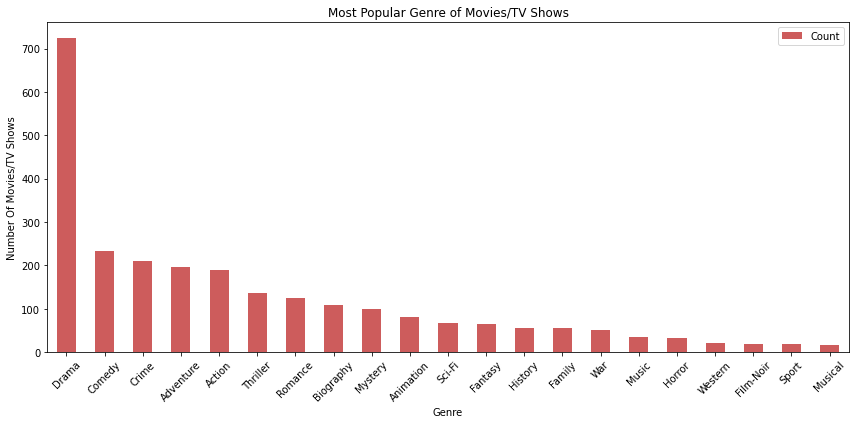

In [29]:
fig, ax = plt.subplots(figsize=(12, 6))  # Specify the size in inches
genre_counts.plot(x='Genre', y='Count', kind='bar', color='indianred', ax=ax) # plots the bar chart using the plot() method
#specifie the x-axis as the 'Genre',the y-axis as the 'Count', and the chart type as a bar chart.then color parameter and the ax=ax parameter assigns the plot to the specified axes object ax.
#add additional customization to the plot:
plt.title('Most Popular Genre of Movies/TV Shows')
plt.xlabel('Genre')
plt.ylabel('Number Of Movies/TV Shows')
plt.xticks(rotation=45)
plt.tight_layout() #this line adjusts the spacing between subplots to prevent overlapping elements.
plt.show() #display the plot on the screen.

> In addition that the dramatic genre have the highest level of fame, it also surpasses all others by a large differance. On the other hand,the remaining genres show little differences from one genre to the next.

#### <div class="alert alert-danger">6. Identify the director with the most top-rated movies/TV shows by creating a new dataframe containing the count of movies/TV shows directed by each director using pandas.</div> 


Directors who directed the largest number of films in the dataframe:

In [30]:
# Group the DataFrame by director and count the occurrences
director_counts = movies_df['Director'].value_counts().reset_index()

# Rename the columns of the new DataFrame
director_counts.columns = ['Director', 'Count']

# Sort the DataFrame by the count in descending order
director_counts = director_counts.sort_values('Count', ascending=False)
#selects the first row of the director_counts DataFrame,then selects the value in the first column of the selected row.
top_director = director_counts.iloc[0][0]
print(" The director who has directed the most films :")
print("(",top_director,")")
# Print the new DataFrame,this is the top ten too:
print("-----------the top ten-----------")
print(director_counts[:10])

 The director who has directed the most films :
( Alfred Hitchcock )
-----------the top ten-----------
            Director  Count
0   Alfred Hitchcock     14
1   Steven Spielberg     13
2     Hayao Miyazaki     11
3    Martin Scorsese     10
4     Akira Kurosawa     10
5    Stanley Kubrick      9
6       Billy Wilder      9
7        Woody Allen      9
8  Christopher Nolan      8
9  Quentin Tarantino      8


Top 10  directors by average Meta Score:

In [31]:
# Group the data by director and calculate the average Meta Score
director_scores = movies_df.groupby('Director')['IMDB_Rating'].mean().reset_index()

# Sort the directors based on average Meta Score in descending order
top_directors = director_scores.sort_values('IMDB_Rating', ascending=False).head(10).reset_index()
top_director_meta=top_directors.iloc[0][1]
# Remove the index column
top_directors = top_directors.drop('index', axis=1)

print(" The director who has the highest average Meta Score:")
print("(",top_director_meta,")")

# Print the top 10 directors
print("-----------Top ten----------")
print("Top 10 active directors by average Meta Score:")
print(top_directors)

 The director who has the highest average Meta Score:
( Frank Darabont )
-----------Top ten----------
Top 10 active directors by average Meta Score:
             Director  IMDB_Rating
0      Frank Darabont         8.95
1      Irvin Kershner         8.70
2      Lana Wachowski         8.70
3        George Lucas         8.60
4     Roberto Benigni         8.60
5    Masaki Kobayashi         8.60
6         Thomas Kail         8.60
7       Sudha Kongara         8.60
8  Fernando Meirelles         8.60
9        Roger Allers         8.50


#### <div class="alert alert-danger">7. Visualize the data using a bar chart to show the director with the most top-rated movies/TV shows using pandas and matplotlib.</div> 


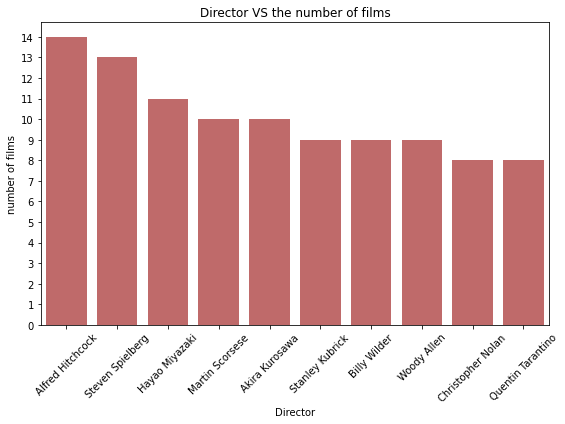

In [32]:
# Count the occurrences of each director
director_counts = movies_df['Director'].value_counts().head(10)

# Plot the bar chart
plt.figure(figsize=(8, 6)) #specifie size of 8 inches by 6 inches.
sns.countplot(x=movies_df['Director'], order=director_counts.index, color='indianred') #creates a countplot using sns.countplot()
plt.title('Director VS the number of films') #add a title to the plot
plt.xlabel('Director') #set the x-axis label as 'Director'
plt.ylabel('number of films') #set the y-axis label as 'number of films'.
plt.yticks(np.arange(0, 15, 1))#for more legible readings y_axes tick locations will be spaced evenly from 0 to 15, with a step size of 1.
plt.xticks(rotation=45) #rotates the x-axis tick labels by 45 degrees for better readability.
plt.tight_layout() #adjusts the spacing between subplots to prevent overlapping elements.
plt.show() #displays the plot on the screen
## range of values for the top ten :(8-14)

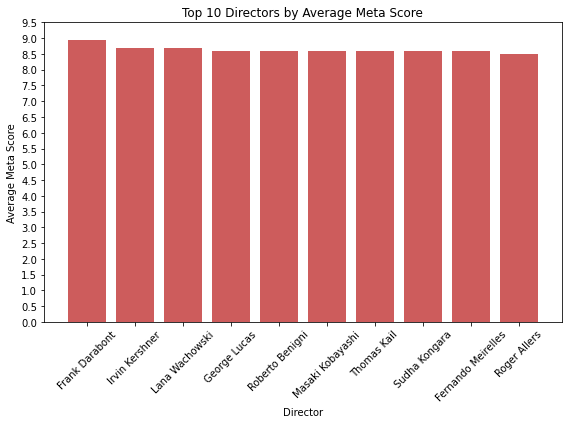

In [33]:
# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(top_directors['Director'], top_directors['IMDB_Rating'], color='indianred')

# Add labels and title
plt.title('Top 10 Directors by Average Meta Score')
plt.xlabel('Director')
plt.ylabel('Average Meta Score')
plt.yticks(np.arange(0, 10, 0.5)) # for more legible readings y_axes tick locations will be spaced evenly from 0 to 10, with a step size of 0.5.
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout() #adjusts the spacing between subplots or plot elements to prevent overlapping
plt.show()
## range of values for the top ten : (8.5-8.95)

> **one addition thing for more information related to this branch:**
> Here the presentation of the top movies with highest IMDB Rating and the director who directed each of them,to get an idea of the directors who directed the highest rated films

In [34]:
#top movie with Highest IMDB Rating:
top_10_movies=movies_df.sort_values('IMDB_Rating', ascending=False).head(10)  #sorting based on IMDB ratings.
#top_10_movies

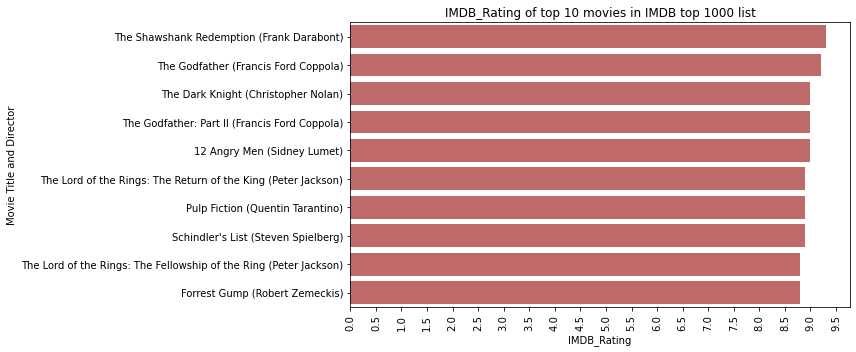

In [35]:
# Combine the movie title and director name for each film
top_10_movies['Movie_Info'] = top_10_movies['Movie_title'] + ' (' + top_10_movies['Director'] + ')'

# Plot the bar chart:
plt.figure(figsize=(12, 5))
sns.barplot(x='IMDB_Rating', y='Movie_Info', data=top_10_movies, color='indianred')
plt.title('IMDB_Rating of top 10 movies in IMDB top 1000 list')
plt.xlabel('IMDB_Rating')
plt.ylabel('Movie Title and Director')
plt.xticks(np.arange(0, 10, 0.5))
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.tight_layout()
plt.show() 
# range of values for the top ten : (8.8-9.3)

#### <div class="alert alert-danger">8. a) Write a report summarizing your analysis and findings,using markdown cells in the Jupyter notebook.</div> 


###  <font color=indianred> ***Analysis Report: Top Movies and TV Shows Analysis*** </font> 
In this analysis, we explored a dataset containing information about the top 1000 movies and TV shows from IMDB. Our goal was to gain insights into the dataframe, identify the most popular genres, and determine the directors with the most top-rated productions.
And here a concise summary that encompasses the key findings obtained from the analysis.

<font color=indianred> ***Data Cleaning and Preprocessing:*** </font> 
-  loaded the dataset into a pandas DataFrame and performed initial data exploration.
-  Identified missing values in the 'Certificate', 'Meta_score', and 'Gross' columns and handled them.
-  Converted the data type in some columns to a suitable type for analysis after verifying all the values so that the entire column can be converted correctly.and some other procedures to ensure that all data is ready to be dealt with and analyzed.

<font color=indianred> ***Most Popular Genres:*** </font> 
Analyz the dataset to identify the most popular genres among the top movies and TV shows.
By splitting the 'Genre' column,and counte the occurrences of each genre.the genre with the highest count represented the most popular genre.
The most popular genre among the top movies and TV shows was **Drama**, followed by **Comedy** and **Crime**, dramatic genre surpasses all others by a large differance,and the other genres show little differences between them.and represent this difference,by using a bar chart that highlights the contrast between different genres.

<font color=indianred> ***Director with the Most Top-rated Productions:*** </font> 
identify the director with the most top-rated movies and TV shows.
by creating a new DataFrame and counting the occurrences of each director, and determine the director with the highest count.
- the director who has directed the most films is: **Alfred Hitchcock**
- the director who has the highest average Meta Score is: **Frank Darabont**
- the director who directed the highest rated movie is: **Frank Darabont** 

So the analysis of the top movies and TV shows dataset provided valuable insights into the most popular genres and the directors with the most top-rated productions.



#### <div class="alert alert-danger">8.b) including any insights or observations you discovered.</div> 



Some general additional analysis to try to discover more information:

> - <font color=brown> **Calculating the correlation between the numeric columns to try to find any relation between them,and the strength of the correlation increases as the value approaches 1 or -1.** </font> 


In [36]:
# Calculate the correlation matrix
correlation_matrix = movies_df.corr()

# Print the correlation matrix
print(correlation_matrix)

               Released_Year  Time_min  IMDB_Rating  Meta_score  Num_of_votes  \
Released_Year       1.000000  0.165873    -0.131152   -0.293873      0.241779   
Time_min            0.165873  1.000000     0.243096   -0.026361      0.173264   
IMDB_Rating        -0.131152  0.243096     1.000000    0.258650      0.494979   
Meta_score         -0.293873 -0.026361     0.258650    1.000000     -0.026940   
Num_of_votes        0.241779  0.173264     0.494979   -0.026940      1.000000   
Gross               0.232582  0.138353     0.085518   -0.051889      0.588428   

                  Gross  
Released_Year  0.232582  
Time_min       0.138353  
IMDB_Rating    0.085518  
Meta_score    -0.051889  
Num_of_votes   0.588428  
Gross          1.000000  


here that most of the values of the correlation between the columns are weak, and the most two highest values:
- correlation between the `Num_of_votes` column and `Gross` column with value : 0.588428
- correlation between the `Num_of_votes` column and `IMDB_Rating` column with value : 0.494979
- However, the correlation remains weak between columns in this data frame,there are no strong correlation between them.

> - <font color=brown> **The box plot for some columns(`Gross,IMDB_Rating,Meta_score`).this allows us to get an idea of where the data is concentrated in each column, and also to know the outliers and their range.** </font> 


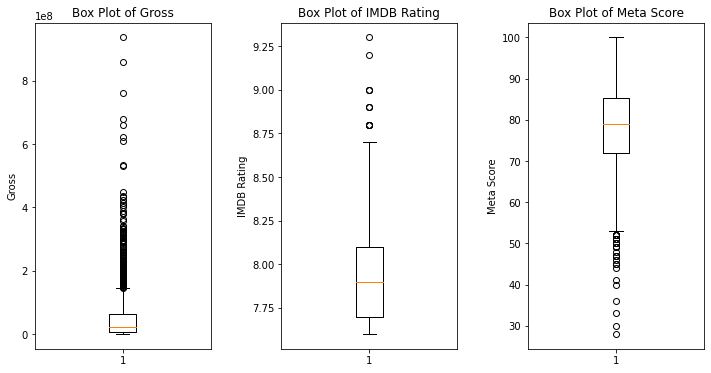

In [37]:
#import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 6)) #figure with subplots,creates 1 row and 3 columns of subplots and set the size.

# Plot box plots for each column
#first subplot:
axs[0].boxplot(movies_df['Gross'].dropna())
axs[0].set_title('Box Plot of Gross')
axs[0].set_ylabel('Gross')
#second subplot:
axs[1].boxplot(movies_df['IMDB_Rating'])
axs[1].set_title('Box Plot of IMDB Rating')
axs[1].set_ylabel('IMDB Rating')
#third subplot:
axs[2].boxplot(movies_df['Meta_score'].dropna())
axs[2].set_title('Box Plot of Meta Score')
axs[2].set_ylabel('Meta Score')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the plot
plt.show()


- `Gross column`: most of the data is concentrated in a specific area, and 75% of it is under the value 61 million, and there are many films that exceeded the rate and achieved relatively huge profits.(highest value 930 million)
- `IMDB Rating column`: most of IMDB ratings between 7.6 and 8.1, with some films that got a very high rating.(highest IMDB rate : 9.3)
- `Meta Score column` :most of the films got a high rating , and some of movies got a 100 rating, and there are outliers values for some films that got a low rating (lowest value 28)

> - <font color=brown> **The histograms for another numerical columns to gain a better understanding of the data distribution and to visualize how the data is represented within each column:** </font> 


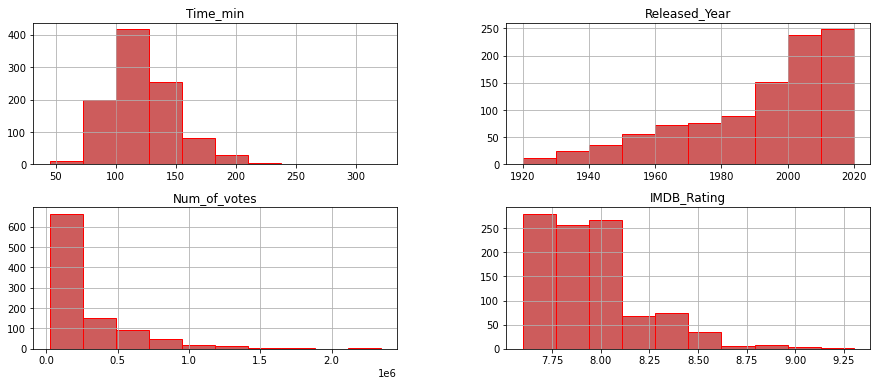

In [38]:
#defines a list that contains the names of the numerical columns i want to plot histograms for:
numerical_attributes = ['Time_min','Released_Year','Num_of_votes','IMDB_Rating']
#generates histograms
movies_df[numerical_attributes].hist(figsize = (15, 6), color = 'indianred', edgecolor = 'red', layout = (2, 2));


- The majority of films are categorized within a medium time range of 75 to 150 minutes, with a small percentage representing shorter films and few long films exceeding the usual duration.
- The films are distributed over the years and their number increases,as the highest number of films was produced in the time period from 2000 to 2020.
- The majority of films received a similar range of votes, with a percentage of films receiving significantly more votes than the majority. and the highest number of votes received by a film was nearly 2.3 million votes.
- The majority of films have ratings between 7.6 and 8.1,indicating the highest number of films in this range.In addition,there are relatively few films that received exceptionally high ratings, reaching in maximum 9.3/10.

> - <font color=brown> **As recently shown,several films have a full rate in meta-score column (100/100),so here is an attempt to examine if the IMDB rating is also high and almost identical for these films:** </font> 

In [39]:
#movies with 100.0 Meta Score and their IMDB Ratings
#meta_score_movies=movies_df[movies_df.Meta_score !='No Meta score']  #not considering data with no meta score
mov_100_Meta = movies_df[ movies_df.Meta_score==100]   #data with meta score 100
mov_100_Meta

,Movie_title,Released_Year,Certificate,Time_min,Genre,IMDB_Rating,Meta_score,Director,Num_of_votes,Gross
1,The Godfather,1972,A,175,"[Crime, Drama]",9.2,100.0,Francis Ford Coppola,1620367,134966411.0
50,Casablanca,1942,U,102,"[Drama, Romance, War]",8.5,100.0,Michael Curtiz,522093,1024560.0
81,Rear Window,1954,U,112,"[Mystery, Thriller]",8.4,100.0,Alfred Hitchcock,444074,36764313.0
116,Lawrence of Arabia,1962,U,228,"[Adventure, Biography, Drama]",8.3,100.0,David Lean,268085,44824144.0
119,Vertigo,1958,A,128,"[Mystery, Romance, Thriller]",8.3,100.0,Alfred Hitchcock,364368,3200000.0
124,Citizen Kane,1941,UA,119,"[Drama, Mystery]",8.3,100.0,Orson Welles,403351,1585634.0
260,Trois couleurs: Rouge,1994,U,99,"[Drama, Mystery, Romance]",8.1,100.0,Krzysztof Kieslowski,90729,4043686.0
274,Fanny och Alexander,1982,A,188,[Drama],8.1,100.0,Ingmar Bergman,57784,4971340.0
423,Il conformista,1970,UA,113,[Drama],8.0,100.0,Bernardo Bertolucci,27067,541940.0
440,Sweet Smell of Success,1957,Approved,96,"[Drama, Film-Noir]",8.0,100.0,Alexander Mackendrick,28137,23530892.0


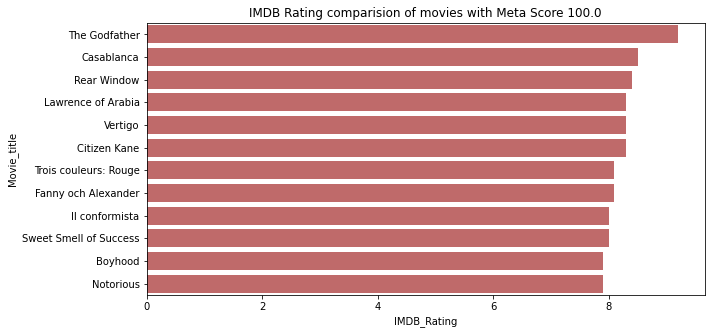

In [40]:
plt.figure(figsize=(10, 5))     #plotting movies with 100 meta score vs their IMDB ratings.
sns.barplot(x='IMDB_Rating', y='Movie_title', data=mov_100_Meta,color='indianred');
plt.title('IMDB Rating comparision of movies with Meta Score 100.0');

While 12 films have the same high Meta Score(100/100), there is a notable difference in the evaluation IMDB_Rating values.

It is noteworthy that the directors in this list were not repeated, with the exception of one that was repeated three times, (the director : Alfred Hitchcock),the director of the largest number of films,as previously shown.
And the drama here was present in 10 films on this list from 12 films.


> -  <font color=brown> **Since it was previously observed that the correlation between the IMDB_rating column and Gross was weak, I will try to find out if the films with the highest IMDB_rating also achieve high gross.I will display a chart to illustrate this relationship:** </font> 


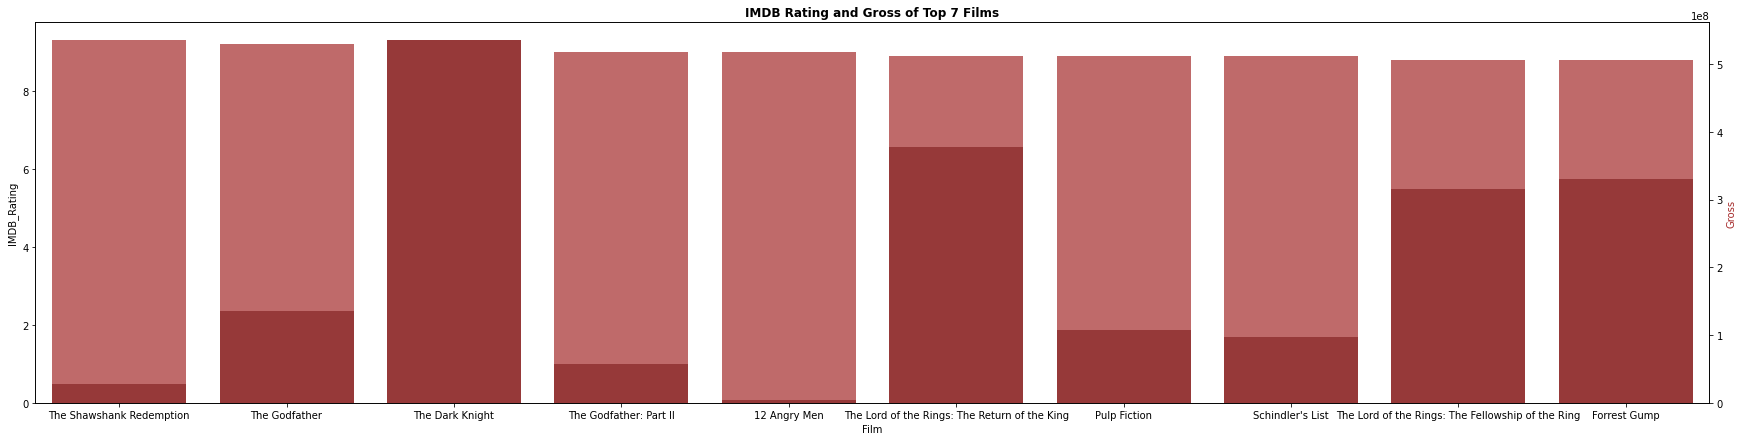

In [41]:
# Sort the dataframe by IMDB_Rating in descending order
sorted_movies_df = movies_df.sort_values('IMDB_Rating', ascending=False)

# Select the top 7 films with the highest IMDB ratings
top_movies = sorted_movies_df[:10]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(30, 7))

# Plot the IMDB Rating
sns.barplot(x=top_movies['Movie_title'], y=top_movies['IMDB_Rating'], color='indianred', ax=ax)
ax.set_title("IMDB Rating and Gross of Top 7 Films", weight="bold")

# Create a second y-axis
ax2 = ax.twinx()

# Plot the Gross
sns.barplot(x=top_movies['Movie_title'], y=top_movies['Gross'], color='brown', ax=ax2)

# Set the y-axis label for the second plot
ax2.set_ylabel('Gross', color='brown')

# Set the x-axis label
ax.set_xlabel('Film')

# Show the plot
plt.show()


All of these films have high and close IMDB ratings, but there is a high disparity in the profits achieved by each film. Some of them achieved high profits like (The Dark Knight), and some achieve little profits despite their high rating like (12 Angry Men),as shown in the drawing.

> - <font color=brown> **Check whether the high IMDB rating means more number of votes for top rated films:** </font> 
>
> By replacing the Gross column with the num_of_votes column in the previous cell


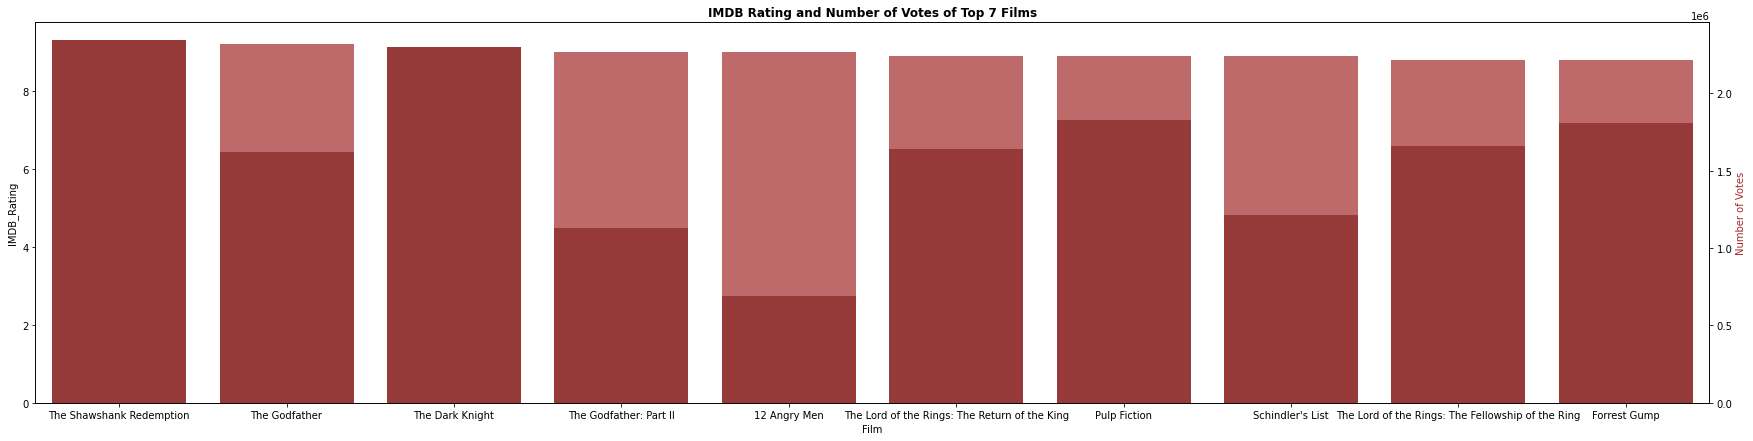

In [42]:
# Select the top 7 films with the highest IMDB ratings
top_movies = sorted_movies_df[:10]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(30, 7))

# Plot the IMDB Rating
sns.barplot(x=top_movies['Movie_title'], y=top_movies['IMDB_Rating'], color='indianred', ax=ax)
ax.set_title("IMDB Rating and Number of Votes of Top 7 Films", weight="bold")

# Create a second y-axis
ax2 = ax.twinx()

# Plot the Number of Votes
sns.barplot(x=top_movies['Movie_title'], y=top_movies['Num_of_votes'], color='brown', ax=ax2)

# Set the y-axis label for the second plot
ax2.set_ylabel('Number of Votes', color='brown')

# Set the x-axis label
ax.set_xlabel('Film')

# Show the plot
plt.show()


Some columns here show a large percentage of votes, so there is some agreement between the viewer's opinion and the IMDB rating.

> - <font color=brown>**Does the distribution of films and their profits correlate with the passage of years?**</font>

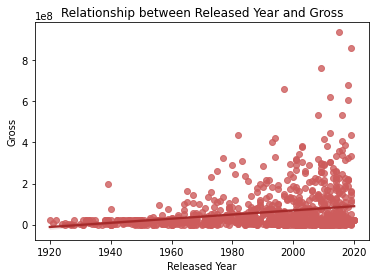

In [44]:
# Create a scatter plot with regression line
sns.regplot(x=movies_df['Released_Year'], y=movies_df['Gross'], scatter_kws={'color': 'indianred'}, line_kws={'color': 'brown'})

# Set the title and labels
plt.title('Relationship between Released Year and Gross')
plt.xlabel('Released Year')
plt.ylabel('Gross')

# Show the plot
plt.show()


- Here we note that the first years the **profits were close to each other**, and with the passage of the years the differences became larger until they reached very large differences in recent years, so there may be a movie that achieved very high profits, and some don't achieve much and can cause a loss for their producer.
- And the number of produced films increase over the years.

> -  <font color=brown> **The maximum number of movies released in:** </font> 


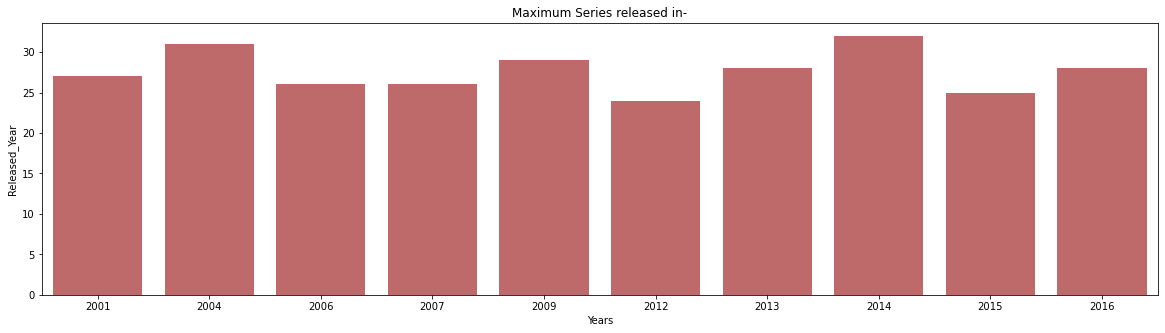

In [45]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=movies_df['Released_Year'].value_counts()[:10].index,y=movies_df['Released_Year'].value_counts()[:10],color = 'indianred')
g.set_title("Maximum Series released in-")
g.set_xlabel("Years")
plt.show()

> - <font color=brown> **The number of films produced in each certificate:** </font> 


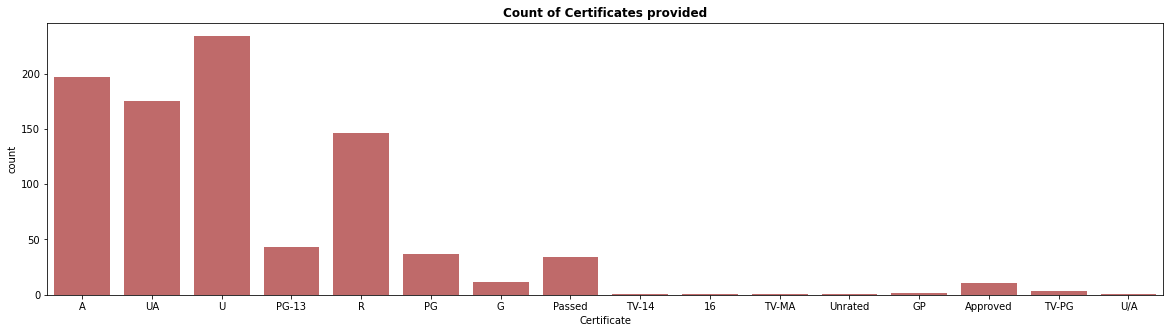

In [48]:
certificates = movies_df[movies_df['Certificate'] != 'Unknown']['Certificate']
fig, axs = plt.subplots(figsize=(20, 5))
g = sns.countplot(x=certificates, color='indianred')
g.set_title("Count of Certificates provided", weight="bold")
plt.show()


 Most frequent Certificate:
- 'A' (Adults Only)
-  'UA' (Unrestricted Public Exhibition-Adults)
-  'U' (Universal)
-  'R' (Restricted) 

> - <font color=brown> **The movies that generated the highest revenue:** </font> 



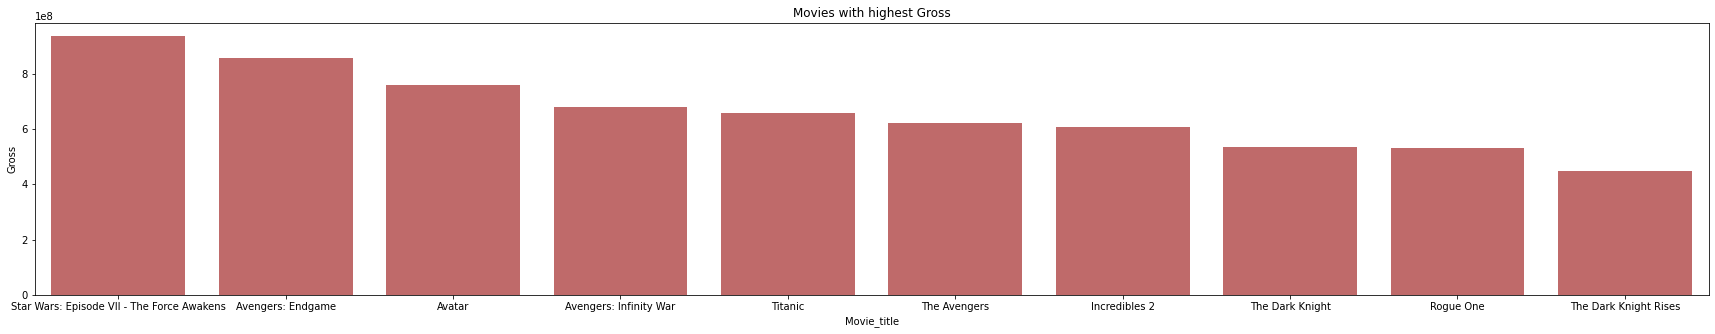

In [47]:
highest_earning = movies_df.sort_values(['Gross'], ascending = False)
fig,axs=plt.subplots(figsize=(30,5))
g=sns.barplot(x=highest_earning['Movie_title'][:10],y=highest_earning['Gross'][:10], color = 'indianred')
g.set_title("Movies with highest Gross")
plt.show()

#### <font color=brown>These were a few of general and simple ideas and analysis that can be derived from IMDB Movies Dataset.</font>
